# ML Project on Iris flower species prediction using KNN Algorithm    
      
      
# Name - Harshit Singh
# ID - B120026

***Problem Statement -*** *We have given a dataset of iris flower in which it's different features are given and on that basis it's type of species is given. So based on the given dataset, we have to classify the species and prepare a model which will evaluate or predict the species or label based on the given it's different features.*

***Proposed solution -*** *So, for this model we are going to use KNN Classification algorithm based on Supervised ML. We are using KNN because-         
                i) It is simple to implement.      
                ii) It can classify and can easily identify the category or class of a particular dataset.     
                iii) It helps in pattern recognition*

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading iris dataset
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 1) Data Pre-Processing

In [3]:
#Extracting Independent and dependent Variable
X = data[[
    'SepalLengthCm',
    'SepalWidthCm',
    'PetalLengthCm',
    'PetalWidthCm'
]]     #all parameters

y = data['Species']   #class labels

# X = data.iloc[:,:-1]
# y = data['Species']
# y= data.iloc[:,4].values  

In [4]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [6]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=42)  

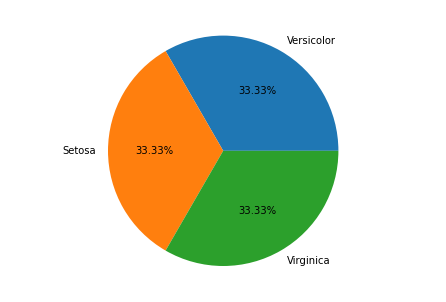

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

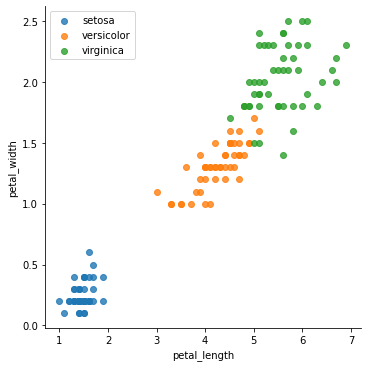

In [8]:
# vizualizing the data points and its classifications
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)
plt.legend()
plt.show()

# 2) Fitting K-NN classifier to the Training data

In [9]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
# classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='uniform') 
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

# 3) Predicting the Test Result

In [10]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [11]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [12]:
classifier.score(x_test, y_test)

1.0

In [13]:
# Performing some test operation the model:
testSet = [[4.5, 2.8, 1.4, 0.2]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:", classifier.predict(test))
# print("neighbors", classifier.kneighbors(test))

     0    1    2    3
0  4.5  2.8  1.4  0.2
predicted: ['Iris-setosa']
